In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', **{'size' : 22})

In [4]:

def MNK(x,y,k):
    X = []
    for i in range(k) :
        X.append(x**i)
    X = np.array(X)
    XT = X
    X = np.transpose(X)
    Z =XT@X
    Z_1 = np.linalg.inv(Z)
    res= Z_1@XT@y
    Q = pow(float((X@res - y)@(X@res - y) ) , 1.0/len(x) )

    return (res,Q )#,# np.linalg.norm(Z,ord = 2)*np.linalg.norm(Z_1,ord = 2))

Среднеквадратическая ошибка для аппроксимации k =  2  : Q =  30.285194091043827
Среднеквадратическая ошибка для аппроксимации k =  3  : Q =  24.711707232614728
Среднеквадратическая ошибка для аппроксимации k =  4  : Q =  24.562854283283034
Среднеквадратическая ошибка для аппроксимации k =  5  : Q =  37.14748467306064


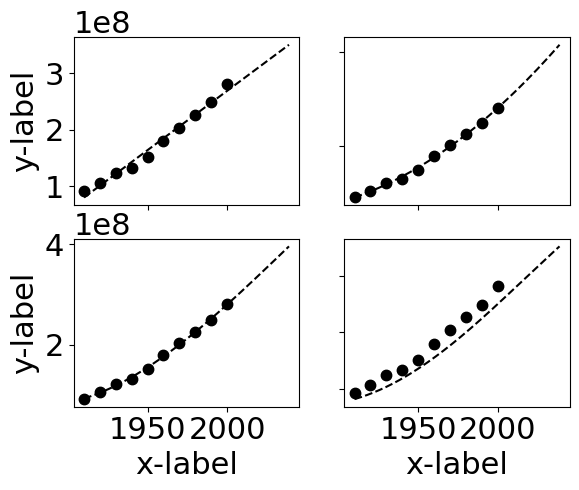

In [17]:
x_array = np.array([1910.0 ,1920.0  ,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,2000.0] )
y_array = np.array([92228496.0 ,106021537.0,123202624.0,132164569.0 ,151325798.0 ,179323175.0,203211926.0,226545805.0,248709873.0,281421906.0] )

x = np.arange(1910.0,2040.0,1.0)

y = [0,0,0,0,0,0,0]
Norms1 =[0,0,0,0,0,0]
for k in range(2,6):
    (res,Q,Norms1[k]) = MNK(x_array,y_array,k)
    for i in range(k):
        y[k] = y[k] + res[i]*x**i
    print("Среднеквадратическая ошибка для аппроксимации k = ", k ," : Q = ", Q )

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(x_array,y_array , 'k.', ms=15, label='Датасет (х,у)')
axs[0, 0].plot(x ,y[2] , 'k--', ms=15, label='Аппроксимация k = 2')
axs[0, 1].plot(x_array,y_array , 'k.', ms=15, label='Датасет (х,у)')
axs[0, 1].plot(x ,y[3] , 'k--', ms=15, label='Аппроксимация k = 3' )
axs[1, 0].plot(x_array,y_array , 'k.', ms=15, label='Датасет (х,у)')
axs[1, 0].plot(x ,y[4] , 'k--', ms=15, label='Аппроксимация k = 4')
axs[1, 1].plot(x_array,y_array , 'k.', ms=15, label='Датасет (х,у)')
axs[1, 1].plot(x ,y[5] , 'k--', ms=15, label='Аппроксимация k = 5' )


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

for ax in axs.flat:
    ax.label_outer()


In [18]:
def MNK_2(x,y,k):
    X = []
    for i in range(k) :
        X.append(x**i)
    X = np.array(X)
    XT = X
    X = np.transpose(X)
    Z =XT@X
    Z_1 = np.linalg.inv(XT@X)
    res= Z_1@XT@y
    Q = pow(float((X@res - y)@(X@res - y) ) , 1.0/len(x) )
    return (res,Q, np.linalg.norm(Z,ord = 2)*np.linalg.norm(Z_1,ord = 2))

ValueError: x and y must have same first dimension, but have shapes (130,) and (1,)

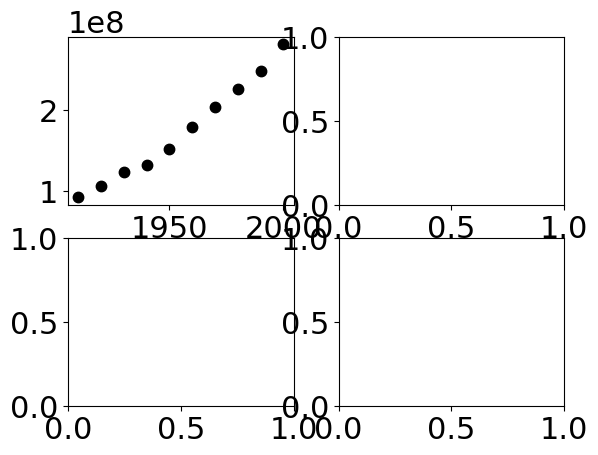

In [17]:
x_array = np.array([1910.0 ,1920.0  ,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,2000.0] )
y_array = np.array([92228496.0 ,106021537.0,123202624.0,132164569.0 ,151325798.0 ,179323175.0,203211926.0,226545805.0,248709873.0,281421906.0] )

# x_array = np.arange(1910.0 ,2000.0,0.1 )
# y_array = np.arange(92228469.0 , )

x_array = (x_array -1955.0*np.ones(len(x_array)))/45.0

x = np.arange(1910.0,2040.0,1.0) 
x = (x - 1955.0*np.ones(len(x)))/45.0


y = [0,0,0,0,0,0,0]
# Norms2= [0,0,0,0,0,0]
for k in range(2,2):
    (res,Q) = MNK(x_array,y_array,k)
    for i in range(k):
        y[k] = y[k] + res[i]*x**i
    print("Среднеквадратическая ошибка для аппроксимации k = ", k ," : Q = ", Q )

fig, axs = plt.subplots(2, 2)


## Вернем данные в изначальное состояние : 
x_array = 45.0*x_array + 1955.0
x = 45.0*x + 1955.0


axs[0, 0].plot(x_array,y_array , 'k.', ms=15, label='Датасет (х,у)')
axs[0, 0].plot(x ,y[2] , 'k--', ms=15, label='Аппроксимация k = 2')
# axs[0, 1].plot(x_array,y_array , 'k.', ms=15, label='Датасет (х,у)')
# axs[0, 1].plot(x ,y[3] , 'k--', ms=15, label='Аппроксимация k = 3' )
# axs[1, 0].plot(x_array,y_array , 'k.', ms=15, label='Датасет (х,у)')
# axs[1, 0].plot(x ,y[4] , 'k--', ms=15, label='Аппроксимация k = 4')
# axs[1, 1].plot(x_array,y_array , 'k.', ms=15, label='Датасет (х,у)')
# axs[1, 1].plot(x ,y[5] , 'k--', ms=15, label='Аппроксимация k = 5' )


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

for ax in axs.flat:
    ax.label_outer()

#### Последний метод работает лучше , тогда с его помощью предскажем сколько человек будет жить в 2010 в США и сравним с известным значением  в 308 745 538 человек 

Предсказание численности людей :  [7.58880221e+08 8.27084460e+08 9.04848887e+08 9.92599476e+08
 1.09029859e+09 1.19744498e+09 1.31307380e+09 1.43575657e+09
 1.56360123e+09 1.69425209e+09]
Относительная ошиюка предсказания :  [59.31564307 62.6706155  65.87877353 68.8952548  71.68247846 74.21630698
 76.48680987 78.49596898 80.25420213 81.77688318] %


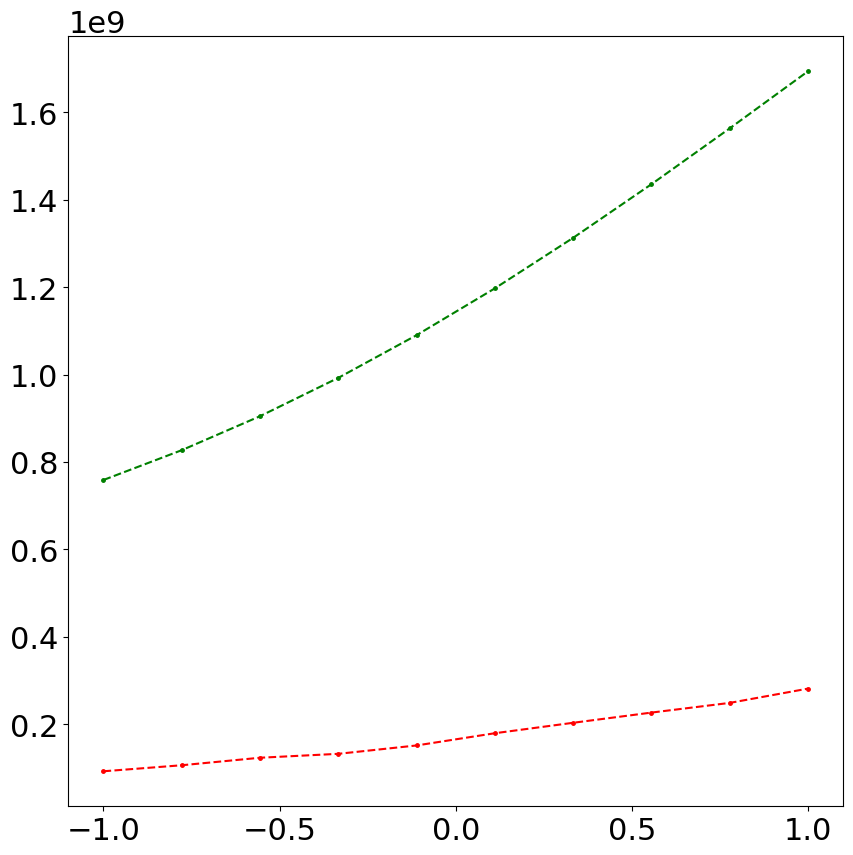

In [15]:
x_array = np.array([1910.0 ,1920.0  ,1930.0,1940.0,1950.0,1960.0,1970.0,1980.0,1990.0,2000.0] )
y_array = np.array([92228496.0 ,106021537.0,123202624.0,132164569.0 ,151325798.0 ,179323175.0,203211926.0,226545805.0,248709873.0,281421906.0] )

x_array = (x_array -1955.0*np.ones(len(x_array)))/45.0


year = (2010.0 - 1955.0 )/45.0
k = 2
(res,Q) = MNK(x_array,y_array,k)
for i in range(k):
    y = y + res[i]*x_array**i
print("Предсказание численности людей : ", y)
print("Относительная ошиюка предсказания : ",abs((y - 308745538.0)/y)*100.0 ,"%")

plt.figure(figsize=(10, 10))
plt.plot(x_array , y_array,color = "r", marker='o', linestyle='dashed', ms=2.5, label='Датасет 1(Координата x, Координата y)')
plt.plot(x_array , y,color = "g", marker='o', linestyle='dashed', ms=2.5, label='Датасет 2(Координата x, Координата y)')

plt.show()

In [25]:
print(Norms1 ,"первый МНК")
print( Norms2, "Второй МНК, видно - здесь числа обусловленности сильно меньше")

[0, 0, 17714169413.996407, 4.045648366031197e+20, 1.0119734261721054e+31, 4.014189071193609e+40] первый МНК
[0, 0, 2.454545454545454, 10.927631156049975, 49.619697910062136, 279.3762649129606] Второй МНК, видно - здесь числа обусловленности сильно меньше
